# Use partial-CEC (=projection) to break larger simplices into smaller ones

In [1]:
import numpy as np
import xgi


from hyperfunctions import *

The hypergraph has [0, 1, 2, 3, 4] nodes and ['a', 'b', 'c', 'd'] edges


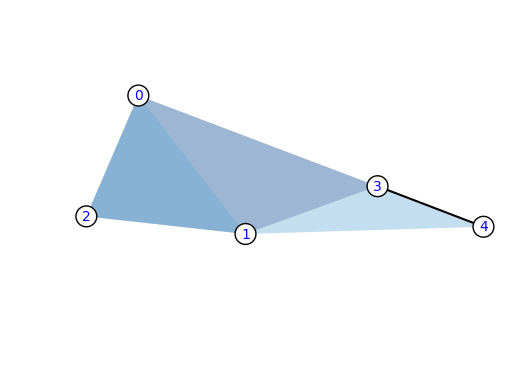

In [2]:
hyperedge_dict = {'a': [0,1,2], 'b': [0,1,2,3], 'c': [1,3,4], 'd': [3,4]}
H = xgi.Hypergraph(hyperedge_dict)
print(f"The hypergraph has {H.nodes} nodes and {H.edges} edges")
xgi.draw(H, node_labels=True, font_color_nodes="blue")

In [24]:
def uniform_adjacency_combinatorial_tensor(H, m = None):
    '''Given a Hypergraph H, returns its adjacency tensor (with the Permutations with Repetions number corresponding to 
    the number of phantom nodes added).

    If the hypergraph is not uniform or m != the dimension of the hyperedges, we uplift the lower-dimensional hyperedges 
    by introducing a "phantom node" (indexed as N+1), and we project down the higher-dimensional hyperedges.

    :param h :: Hypergraph:
    :return t :: numpy.ndarray:
    '''
        
    N = len(H.nodes)

    # Find maximum hyperedge dimension
    if not m:
        m = H.edges.size.max()
    else:
        assert isinstance(m, int)

    if not xgi.is_uniform(H):
        # In case it isn't uniform, we node to add the phantom node
        N += 1

    shape = [N] * m
    T = np.zeros(shape)

    # Insert edges in the tensor, multiplying them by their combinatorial factor
    for hyperedge in H.edges.members():

        initial_len = len(hyperedge)
        edge = list(hyperedge) # convert to list to add phantom nodes (possibly more than 1)

        # Uplift adding an extra node enough times
        if len(edge) <= m:
            
            while len(edge) < m:
                edge.append(N - 1)
            perms = list(permutations(edge))

            # Combinatorial factor
            entry = np.math.factorial(initial_len)/np.math.factorial(len(edge))

        # Projection if higher dimensional
        else:
            perms = list(combinations(edge, m))
            entry = 1/len(perms)

        # Add the permutation (uplift) / combination (projection) to the tensor
        for indices in perms:
            T[indices] += entry


    return T


In [28]:
H.edges.members(dtype=dict)

{'a': {0, 1, 2}, 'b': {0, 1, 2, 3}, 'c': {1, 3, 4}, 'd': {3, 4}}

In [27]:
{edge: len(edgenodes) for edge, edgenodes in H.edges.members(dtype=dict).items()}

{'a': 3, 'b': 4, 'c': 3, 'd': 2}

In [25]:
H.edges.size.asdict()

{'a': 3, 'b': 4, 'c': 3, 'd': 2}

In [17]:
np.max(H.edges.members())

{1, 3, 4}

In [9]:
T3 = uniform_adjacency_combinatorial_tensor(H, 3)

In [10]:
T.shape

(6, 6, 6)

In [11]:
H.edges.members()

[{0, 1, 2}, {0, 1, 2, 3}, {1, 3, 4}, {3, 4}]

In [12]:
print(T.shape)
print([(np.nonzero(T)[0][i], np.nonzero(T)[1][i], np.nonzero(T)[2][i]) for i in range(len(np.nonzero(T)[0]))])

(6, 6, 6)
[(0, 1, 2), (0, 1, 3), (0, 2, 1), (0, 2, 3), (1, 0, 2), (1, 2, 0), (1, 2, 3), (1, 3, 4), (1, 4, 3), (2, 0, 1), (2, 1, 0), (3, 1, 4), (3, 4, 1), (3, 4, 5), (3, 5, 4), (4, 1, 3), (4, 3, 1), (4, 3, 5), (4, 5, 3), (5, 3, 4), (5, 4, 3)]


In [13]:
T[0,1,2]

1.25